# Introduction  
  
Running a simulation with GillesPy2 requires only 2 components: a model (data), and a solver (algorithm).

## Basic

### Setup the Environment

In [1]:
# 'os' and 'sys' allow us to modify the directory Python searches for source code.
# If you wish to use an installed GillesPy2 package, you do not need to run this cell.
import os
import sys

# If this notebook is being run from within the GillesPy2 source code directory
# we need to let Python know that we want to use it, not the GillesPy2 package.
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))

## Creating a GillesPy2 Model  
  
A GillesPy2 model must include species, rates, and reactions.

In [2]:
# Numpy is used to set the timespan of the Model.
import numpy

# Import the types that'll be needed to define your Model.
from gillespy2.core import (
    Model,
    Species,
    Reaction,
    Parameter
)

"""
Your model is declared and configured as a Python class. As such, the name 
between `class` and `(Model):` can be of your choosing.

For this example we'll be modeling a Michaelis-Menten enzymatic reaction,
so lets set the name accordingly.
"""
class MichaelisMenten(Model):
     def __init__(self, parameter_values=None):

            # Intialize the Model with a name of your choosing.
            Model.__init__(self, name="Michaelis_Menten")
            
            """
            Parameters are constant values relevant to the system, such as reaction kinetic rates.
            
            - name: A user defined name for reference.
            - expression: Some constant value.
            """

            rate1 = Parameter(name="rate1", expression=0.0017)
            rate2 = Parameter(name="rate2", expression=0.5)
            rate3 = Parameter(name="rate3", expression=0.1)
            
            # Add the Parameters to the Model.
            self.add_parameter([rate1, rate2, rate3])
            
            """
            Species can be anything that participates in or is produced by a reaction channel.
            
            - name: A user defined name for the species.
            - initial_value: A value/population count of species at start of simulation.
            """

            A = Species(name="A", initial_value=301)
            B = Species(name="B", initial_value=120)
            C = Species(name="C", initial_value=0)
            D = Species(name="D", initial_value=0)
            
            # Add the Species to the Model.
            self.add_species([A, B, C, D])
            
            """
            Reactions are the reaction channels which cause the system to change over time.
            
            - name: A user defined name for the reaction.
            - reactants: A dictionary with participant reactants as keys, and consumed per reaction as value.
            - products: A dictionary with reaction products as keys, and number formed per reaction as value.
            - rate: A parameter rate constant to be applied to the propensity of this reaction firing.
            - propensity_function: Can be used instead of rate in order to declare a custom propensity function in string format.
            """

            r1 = Reaction(
                    name="r1",
                    reactants={A: 1, B: 1}, 
                    products={C: 1},
                    rate=rate1
                )
            
            r2 = Reaction(
                    name="r2",
                    reactants={C: 1}, 
                    products={A: 1, B: 1},
                    rate=rate2
                )
            
            r3 = Reaction(
                    name="r3",
                    reactants={C: 1}, 
                    products={B: 1, D: 1},
                    rate=rate3
                )
            
            # Add the Reactions to the Model.
            self.add_reaction([r1, r2, r3])
            
            # Use NumPy to set the timespan of the Model.
            self.timespan(numpy.linspace(0, 100, 101))

In [3]:
# Instantiate your Model.
model = MichaelisMenten()

## Running Simulations and Plotting

In [4]:
"""
Run a stochastic simulation on the Model and store the results in the 'results' variable.
GillesPy2 will use the best solver for the Model if no solver is declared (see below).
"""

results = model.run()

In [ ]:
"""
These are the possible pure-Python solvers. These may be faster for small (tiny) problem sizes, 
but performance can drop off extremely quickly.
"""

from gillespy2.solvers.numpy import (
	NumPySSASolver,
	ODESolver,
	TauLeapingSolver,
	TauHybridSolver
)

"""
These are the C++ solvers. These can have slower startup time but will quickly outpace their
Python counterparts for larger problem sets.

Note: The usage of the C++ solver family requires dependencies 'GCC' and 'Make' to be installed
on your system. If neither of these can be found, GillesPy2 will select alternate solvers.
"""
from gillespy2.solvers.cpp import (
	SSACSolver,
	ODECSolver,
	TauLeapingCSolver
)

"""
The following code shows how to run the previously defined Model on a solver of your choosing.
Note: You may use the prior imports as a reference, but you do not need to import them all.

The following code shows two example usages -- one using the C++ SSA solver, the other 
using the Python Tau Leaping solver.
"""

# Import the C++ SSA Solver. This will compute highly accurate results, but will be slow for large 
# problem sets.
from gillespy2.solvers.cpp import SSACSolver

# Run the previously defined and instantiate Model with an extra argument.
results = model.run(solver=SSACSolver)

# If we instead want to use a Python solver, we can import and use it in the same way.
from gillespy2.solvers.numpy import TauLeapingSolver

results = model.run(solver=TauLeapingSolver)

### You can find a more thorough list of `model.run()` arguments in [the documentation](https://gillespy2.readthedocs.io/en/latest/classes/gillespy2.core.html#gillespy2.core.gillespy2.Model.run) to customize the behavior of your simulations.

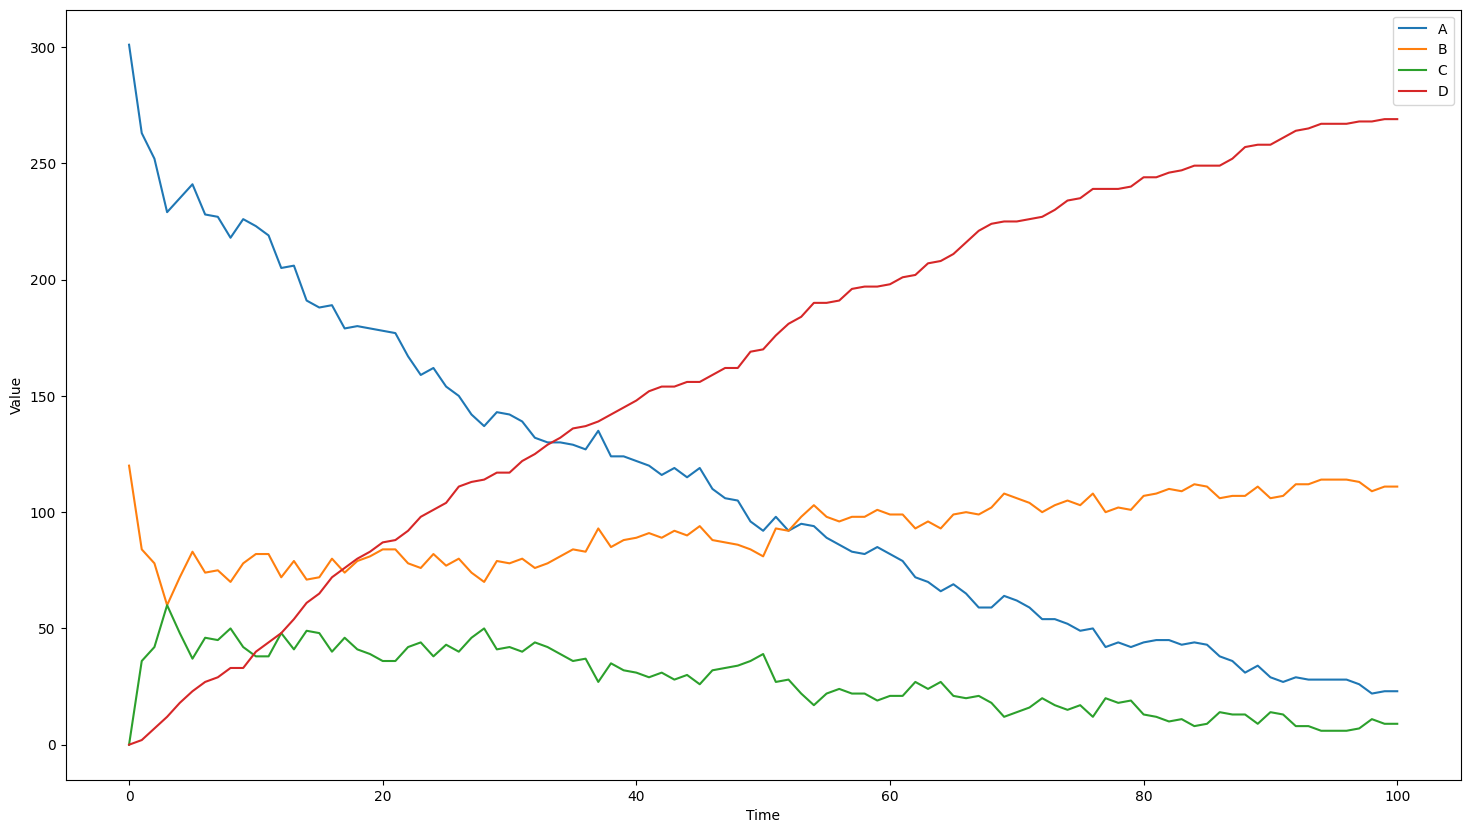

In [5]:
"""
Plot the results of the simulation. 

There are a multitude of arguments that can be set to tweak the behavior and visuals of the plot. 
For now though, lets run it with default settings.
"""

results.plot()

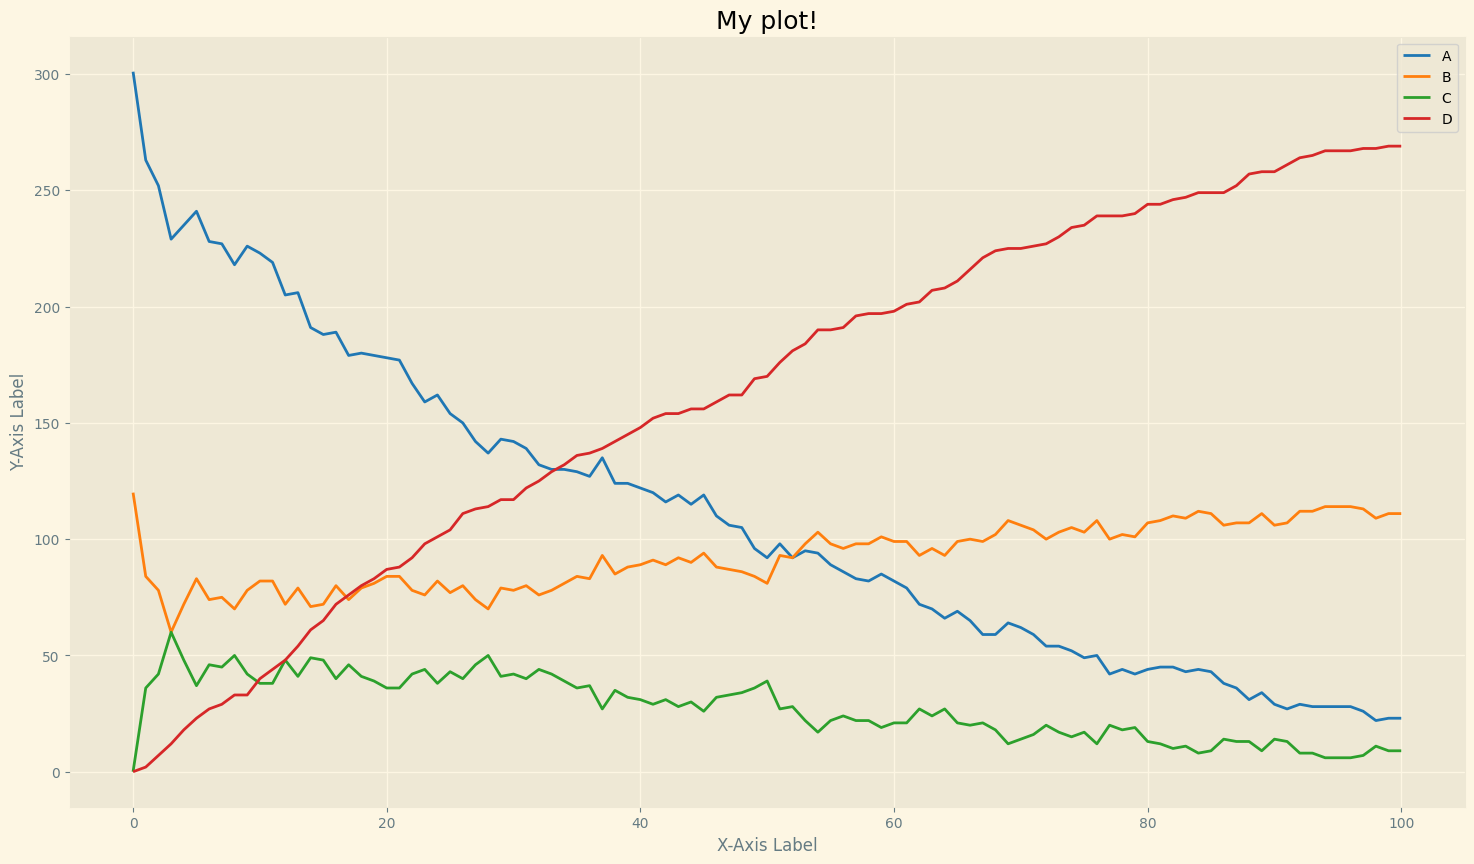

In [6]:
"""
That plot is somewhat boring though, so lets add some labels, a title, and some decorations.
"""

results.plot(
	# Set the title of the X and Y axis.
	xaxis_label="X-Axis Label",
	yaxis_label="Y-Axis Label", 

	# Set the title of the plot.
	title="My plot!",

	# Set to True to show the legend, False to hide it.
	show_legend=True,

	# Set to True to show a graph for each simulation trajectory, False for just one.
	multiple_graphs=False,

	# Set to the name of a matplotlib stylesheet. More designs can be found at the following link:
	# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
	style="Solarize_Light2"
)

### A more complete list of `results.plot()` arguments can be found [in the documentation](https://gillespy2.readthedocs.io/en/latest/classes/gillespy2.core.html#gillespy2.core.results.EnsembleResults.plot).

### GillesPy2 also offers built-in plotly and statistical data plotting. You can view these functions in the [`Results` module documentation](https://gillespy2.readthedocs.io/en/latest/classes/gillespy2.core.html#module-gillespy2.core.results).

## Hybrid - Advanced

Some of the solvers in GillesPy2 provide further options for customizing simulations.  For examples on how to use these advanced features, please see the following links:  

[Hybrid: Using Rate Rules to model continuous species](./AdvancedExamples/Hybrid/hybrid_continuous_species.ipynb)  
[Hybrid: Dynamically switching between stochastic and deterministic representations](./AdvancedExamples/Hybrid/hybrid_switching_example.ipynb)  


